In [1]:
import numpy as np
import pandas as pd
import snorkel

In [2]:
SEED = 0

We first import the datasets.

In [3]:
gop_tweets = pd.read_csv('../data/first-gop-debate-twitter-sentiment/Sentiment.csv')
airline_tweets = pd.read_csv('../data/twitter-airline-sentiment/Tweets.csv')
imdb_revs = pd.read_csv('../data/imdb-sentiments/train.csv')

In [4]:
gop_tweets.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [5]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
imdb_revs.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


Sort the tweets by timestamps.

In [7]:
gop_tweets = gop_tweets.sort_values(by=['tweet_created'])

In [8]:
gop_tweets.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
13857,13858,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,FOX News or Moderators,0.9615,NaN,...,yes,9,Negative,FOX News or Moderators,"This is why I don't watch Fox News, they're al...",NaN,2015-08-06 17:44:53 -0700,629453120108691456,"Cocoa Beach, Florida",Eastern Time (US & Canada)
13861,13862,Donald Trump,1.0000,yes,1.0000,Negative,0.5724,None of the above,0.9618,Donald Trump,...,yes,94,NaN,NaN,RT @RWSurferGirl: Why should @realDonaldTrump ...,NaN,2015-08-06 18:20:33 -0700,629462095805837312,NaN,Central Time (US & Canada)
13870,13871,Ted Cruz,0.9242,yes,0.9614,Positive,0.9614,None of the above,0.9242,Ted Cruz,...,yes,65,Positive,NaN,RT @Lrihendry: #TedCruz headed into the Presid...,NaN,2015-08-06 18:22:27 -0700,629462573641920512,"San Antonio, TX",Central Time (US & Canada)
13862,13863,Donald Trump,0.9218,yes,0.9601,Positive,0.7996,Immigration,0.9218,Donald Trump,...,yes,105,NaN,Immigration,"RT @RWSurferGirl: Trump has got it right, nobo...",NaN,2015-08-06 18:28:29 -0700,629464094219722752,South,Central Time (US & Canada)
13865,13866,Jeb Bush,1.0000,yes,1.0000,Negative,0.8330,FOX News or Moderators,0.9572,Jeb Bush,...,yes,153,NaN,FOX News or Moderators,RT @RWSurferGirl: Fox is cherry picking the ca...,NaN,2015-08-06 18:54:56 -0700,629470751301705728,USA,NaN


In [9]:
gop_tweets.sentiment = pd.Categorical(gop_tweets.sentiment)
gop_tweets['sentiment'] = gop_tweets.sentiment.cat.codes

In [10]:
gop_tweets.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
13857,13858,No candidate mentioned,1.0000,yes,1.0000,0,1.0000,FOX News or Moderators,0.9615,NaN,...,yes,9,Negative,FOX News or Moderators,"This is why I don't watch Fox News, they're al...",NaN,2015-08-06 17:44:53 -0700,629453120108691456,"Cocoa Beach, Florida",Eastern Time (US & Canada)
13861,13862,Donald Trump,1.0000,yes,1.0000,0,0.5724,None of the above,0.9618,Donald Trump,...,yes,94,NaN,NaN,RT @RWSurferGirl: Why should @realDonaldTrump ...,NaN,2015-08-06 18:20:33 -0700,629462095805837312,NaN,Central Time (US & Canada)
13870,13871,Ted Cruz,0.9242,yes,0.9614,2,0.9614,None of the above,0.9242,Ted Cruz,...,yes,65,Positive,NaN,RT @Lrihendry: #TedCruz headed into the Presid...,NaN,2015-08-06 18:22:27 -0700,629462573641920512,"San Antonio, TX",Central Time (US & Canada)
13862,13863,Donald Trump,0.9218,yes,0.9601,2,0.7996,Immigration,0.9218,Donald Trump,...,yes,105,NaN,Immigration,"RT @RWSurferGirl: Trump has got it right, nobo...",NaN,2015-08-06 18:28:29 -0700,629464094219722752,South,Central Time (US & Canada)
13865,13866,Jeb Bush,1.0000,yes,1.0000,0,0.8330,FOX News or Moderators,0.9572,Jeb Bush,...,yes,153,NaN,FOX News or Moderators,RT @RWSurferGirl: Fox is cherry picking the ca...,NaN,2015-08-06 18:54:56 -0700,629470751301705728,USA,NaN


We now extract the text and the labels

In [11]:
gop_text = gop_tweets['text']
y_true = gop_tweets['sentiment'] # True labels

## Creating Labeling Functions

Next we train our classifiers using the data.

We first map the sentiment labels 'positive', 'neutral', and 'negative' to integers 2,1,0 respectively.

In [12]:
airline_tweets.airline_sentiment = pd.Categorical(airline_tweets.airline_sentiment)
airline_tweets['sentiment'] = airline_tweets.airline_sentiment.cat.codes

In [13]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


We now extract the text and the labels

In [14]:
airline_text = airline_tweets['text']
airline_sentiment = airline_tweets['sentiment']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

We now combine the vectorizing step and the model into a pipeline.

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
estimators = [('TfidfVectorizer', TfidfVectorizer()),
              ('clf', MultinomialNB())]
nb_pipe = Pipeline(steps=estimators)

In [18]:
# Fit the model
nb_pipe.fit(airline_text, airline_sentiment)

Pipeline(memory=None,
         steps=[('TfidfVectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [19]:
nb_pipe.predict(np.array(['I love you']))

array([2], dtype=int8)

We next create another Naive Bayes model and train it on the movie reviews dataset.

We first extract the text of the reviews and the sentiment

In [20]:
imdb_revs['sentiment'] = imdb_revs['sentiment'].apply(lambda x: 2 - 2*x)

In [21]:
imdb_revs.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,2
1,Bizarre horror movie filled with famous faces ...,2
2,"A solid, if unremarkable film. Matthau, as Ein...",2
3,It's a strange feeling to sit alone in a theat...,2
4,"You probably all already know this by now, but...",2


In [22]:
imdb_text = imdb_revs['text']
imdb_sentiment = imdb_revs['sentiment']

In [23]:
estimators = [('TfidfVectorizer', TfidfVectorizer()),
              ('clf', MultinomialNB())]
nb_pipe_imdb = Pipeline(steps=estimators)

In [24]:
nb_pipe_imdb.fit(imdb_text, imdb_sentiment)

Pipeline(memory=None,
         steps=[('TfidfVectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

We next import our other two models which we will use as labeling functions.

In [25]:
from textblob import TextBlob, Blobber
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
import nltk
# Download data
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/richardcorrero/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/richardcorrero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
textblob_nb_clf = Blobber(analyzer=NaiveBayesAnalyzer())
textblob_nb_clf('I hate you').sentiment

Sentiment(classification='pos', p_pos=0.5153573426705306, p_neg=0.48464265732946954)

In [27]:
textblob_pa_clf = Blobber(analyzer=PatternAnalyzer())
textblob_pa_clf('I love you').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [28]:
textblob_nb_clf("you suck ").sentiment[1]

0.347060809860146

We now define our labeling functions.

In [29]:
from snorkel.labeling import labeling_function

In [30]:
@labeling_function()
def textblob_pa_lf(text):
    '''Returns
    - 2 if subjectivity > 0.5 and polarity > 0.5
    - 1 if subjectivity > 0.5 and 0.5 > polarity > -0.5
    - 0 if subjectivity > 0.5 and -0.5 > polarity
    - -1 if subjectivity > 0.5
    '''
    polarity, subjectivity = textblob_pa_clf(text['text']).sentiment
    if polarity > 0.33:
        return 2
    elif polarity > -0.33:
        return 1
    return 0

@labeling_function()
def sklearn_nb_imdb_lf(text):
    ''' Returns 
    - 2 if positive
    - 0 if negative
    '''
    return nb_pipe_imdb.predict(text)[0]

@labeling_function()
def sklearn_nb_clf(text):
    ''' Returns 
    - 2 if positive
    - 1 if neutral
    - 0 if negative
    '''
    return nb_pipe.predict(text)[0]

We now apply the labeling functions to the test data

In [31]:
from snorkel.labeling import LabelModel, PandasLFApplier

# Define the set of labeling functions (LFs)
lfs = [textblob_pa_lf, sklearn_nb_imdb_lf, sklearn_nb_clf]

# Apply the LFs to the unlabeled training data
applier = PandasLFApplier(lfs)
L_train = applier.apply(gop_text.to_frame(), 
                        progress_bar=False)


In [32]:
L_train[0:20,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 2, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 2, 0],
       [1, 0, 0],
       [1, 2, 0],
       [1, 0, 0],
       [2, 2, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 2, 0],
       [1, 2, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 2, 0],
       [1, 0, 0],
       [0, 0, 0]])

## Compare LabelModel and OnlineLabelModel

We compare the performance of the offline `LabelModel` and our on-line implementation known as `OnlineLabelModel`. 

In [33]:
from snorkel.labeling import LabelModel

In [34]:
label_model = LabelModel(cardinality=3)
label_model.fit(L_train, seed=SEED)

lm_preds = label_model.predict(L_train)

We now compute the accuracy of the labels generated by `LabelModel`.

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_true, lm_preds)

0.6070939369908442

In [37]:
y_true

13857    0
13861    0
13870    2
13862    2
13865    0
        ..
7898     0
7897     0
7896     0
7895     0
7894     0
Name: sentiment, Length: 13871, dtype: int8

We find the accuracy of the Naive Bayes classifier trained on the Airline Tweets dataset when applied to the GOP tweets dataset.

In [38]:
sklearn_nb_preds = nb_pipe.predict(gop_text)

accuracy_score(y_true, sklearn_nb_preds)

0.6036334799221397

## Accuracy of `OnlineLabelModel`

In [39]:
import sys
sys.path.append('../online_snorkel/')
from online_label_model import OnlineLabelModel

In [40]:
online_label_model = OnlineLabelModel(cardinality=3)
online_label_model.fit(L_train, seed=SEED)

olm_preds = online_label_model.predict(L_train)

In [41]:
accuracy_score(y_true, olm_preds)

0.6070939369908442

## Test accuracy of `OnlineLabelModel` over batches

In [43]:
def test_olm(k=100, alpha=0.05):   
    olm = OnlineLabelModel(cardinality=3)

    batch_size = int(L_train.shape[0] / k)
    folds = {}
    y_fold = {}
    for i in range(k):
        start_index = i * batch_size
        end_index = (i + 1) * batch_size
        folds[i] = L_train[start_index:end_index,:]
        y_fold[i] = y_true[start_index:end_index]

    fold_num = 0
    scores = {}
    lm_scores = {}
    for fold in folds.values():
        if fold_num == 0:
            olm.fit(fold, seed=SEED)
        else:
            olm.partial_fit(fold, alpha=alpha, update_tree=True, seed=SEED)

        # Get fold predictions
        preds = olm.predict(fold)
        lm_fold_preds = lm.predict(fold)
        lm_fold_acc = accuracy_score(y_fold[fold_num], lm_fold_preds)
        lm_scores[fold_num] = lm_fold_acc

        acc = accuracy_score(y_fold[fold_num], preds)
        scores[fold_num] = acc
        fold_num += 1
    
    return lm_scores, scores
k=15
lm = LabelModel(cardinality=3)
lm.fit(L_train, seed=SEED)
lm_preds = lm.predict(L_train)
lm_acc = accuracy_score(y_true, lm_preds)
lm_scores, scores = test_olm(k=k)

<Figure size 4000x3000 with 0 Axes>

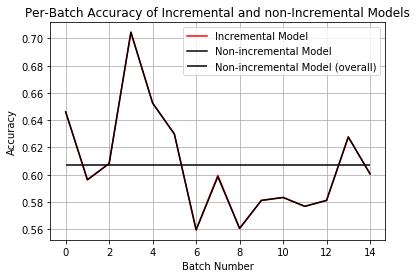

In [44]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_data(lm_scores, scores, k):
    lists = sorted(scores.items())
    lists_lm = sorted(lm_scores.items())
    x, y = zip(*lists)
    x_lm, y_lm = zip(*lists_lm)
    figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots()
    ax.plot(x,y, 'r', label='Incremental Model')
    ax.set(xlabel='Batch Number', ylabel='Accuracy',
       title='Per-Batch Accuracy of Incremental and non-Incremental Models')
    ax.grid()
    ax.plot(x_lm, y_lm, 'k', label='Non-incremental Model')
    ax.hlines(lm_acc, xmin=0, xmax=k-1, label='Non-incremental Model (overall)')
    ax.legend()
    plt.show()
    fig.savefig("accuracy.png", dpi=400)
    
plot_data(lm_scores, scores, k = k)

In [45]:
print('Average per-batch accuracy of Online Label Model: ', np.mean(list(scores.values())))
print('Accuracy of Label Model: ', lm_acc)

Average per-batch accuracy of Online Label Model:  0.6072150072150072
Accuracy of Label Model:  0.6070939369908442


In [46]:
def test_olm_fold(L_fold, y_true_fold, k=16, alpha=0.05):   
    olm = OnlineLabelModel(cardinality=3)

    batch_size = int(L_fold.shape[0] / k)
    folds = {}
    y_fold = {}
    for i in range(k):
        start_index = i * batch_size
        end_index = (i + 1) * batch_size
        folds[i] = L_fold[start_index:end_index,:]
        y_fold[i] = y_true_fold[start_index:end_index]

    fold_num = 0
    scores = np.zeros((k,))
    lm_scores = np.zeros((k,))
    for fold in folds.values():
        if fold_num == 0:
            olm.fit(fold, seed=SEED)
        else:
            olm.partial_fit(fold, alpha=alpha, update_tree=True, seed=SEED)

        # Get fold predictions
        preds = olm.predict(fold)
        lm_fold_preds = lm.predict(fold)
        lm_fold_acc = accuracy_score(y_fold[fold_num], lm_fold_preds)
        lm_scores[fold_num] = lm_fold_acc

        acc = accuracy_score(y_fold[fold_num], preds)
        scores[fold_num] = acc
        fold_num += 1
    
    return lm_scores, scores


<Figure size 4000x3000 with 0 Axes>

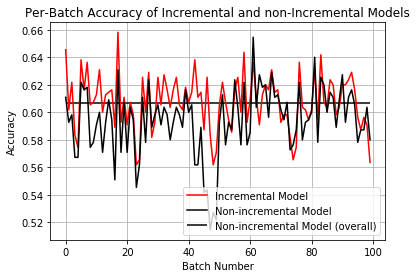

Average Incremental accuracy: 0.6074909090909091
Average Non-Incremental accuracy: 0.5941272727272726


In [47]:
alpha = 0.05

# Conduct test on multiple folds
n_folds = 5
batch_size = int(L_train.shape[0] / n_folds)
splits = {}
y_split = {}
# Split the data
for i in range(n_folds):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size
    splits[i] = L_train[start_index:end_index,:]
    y_split[i] = y_true[start_index:end_index]
   
# Create folds
folds = {}
y_fold = {}
folds[0] = np.vstack((splits[0], splits[1], splits[2], splits[3]))
y_fold[0] = np.append(y_split[0], [y_split[1], y_split[2], y_split[3]])
folds[1] = np.vstack((splits[1], splits[2], splits[3], splits[4]))
y_fold[1] = np.append(y_split[1], [y_split[2], y_split[3], y_split[4]])
folds[2] = np.vstack((splits[2], splits[3], splits[4], splits[0]))
y_fold[2] = np.append(y_split[2], [y_split[3], y_split[4], y_split[0]])
folds[3] = np.vstack((splits[3], splits[4], splits[0], splits[1]))
y_fold[3] = np.append(y_split[3], [y_split[4], y_split[0], y_split[1]])
folds[4] = np.vstack((splits[4], splits[0], splits[1], splits[2]))
y_fold[4] = np.append(y_split[4], [y_split[0], y_split[1], y_split[2]])

n_minibatches = 100
fold_num = 0
lm_scores = np.zeros((n_folds, n_minibatches))
olm_scores = np.zeros((n_folds, n_minibatches))
for i in range(n_folds):
    lm_score, olm_score = test_olm_fold(folds[i], 
                                        y_fold[i], 
                                        k=n_minibatches, 
                                        alpha=0.05
                                        )
    lm_scores[i, :] = lm_score
    olm_scores[i,:] = olm_score
    fold_num += 1
    
# Average scores across folds
average_olm_score = np.mean(olm_scores, axis=0)
average_lm_score = np.mean(lm_scores, axis=0)

# Create dicts
average_olm_score_dict = {}
average_lm_score_dict = {}
for i in range(n_minibatches):
    average_olm_score_dict[i] = average_olm_score[i]
    average_lm_score_dict[i] = average_lm_score[i]
plot_data(average_olm_score_dict, average_lm_score_dict, k=n_minibatches)
print('Average Incremental accuracy:', np.mean(average_lm_score))
print('Average Non-Incremental accuracy:', np.mean(average_olm_score))

## Test Different Values of `alpha`

<Figure size 4000x3000 with 0 Axes>

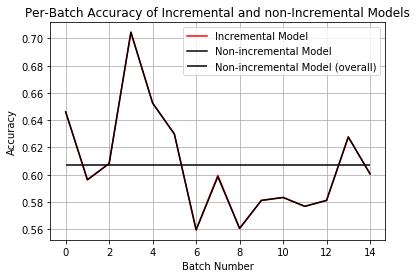

Average per-batch accuracy of Online Label Model:  0.6072150072150072
Accuracy of Label Model:  0.6070939369908442


<Figure size 4000x3000 with 0 Axes>

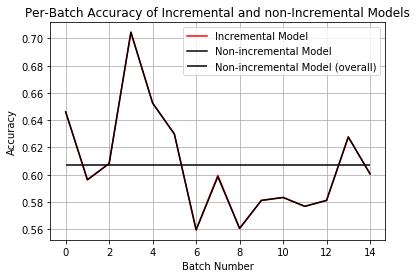

Average per-batch accuracy of Online Label Model:  0.6072150072150072
Accuracy of Label Model:  0.6070939369908442


<Figure size 4000x3000 with 0 Axes>

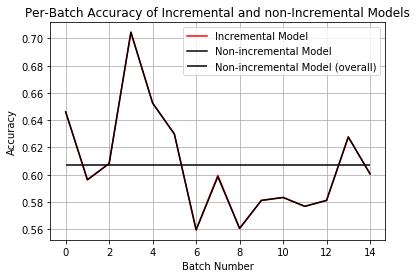

Average per-batch accuracy of Online Label Model:  0.6072150072150072
Accuracy of Label Model:  0.6070939369908442


<Figure size 4000x3000 with 0 Axes>

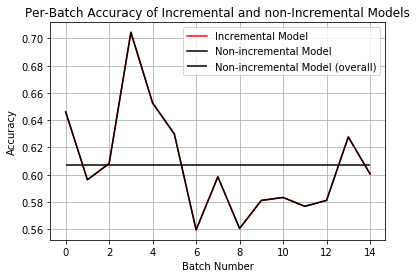

Average per-batch accuracy of Online Label Model:  0.6071428571428571
Accuracy of Label Model:  0.6070939369908442


<Figure size 4000x3000 with 0 Axes>

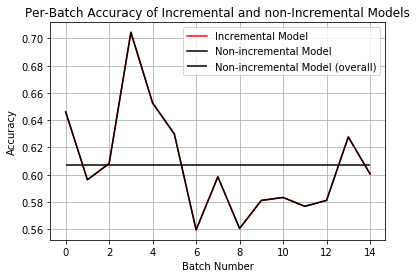

Average per-batch accuracy of Online Label Model:  0.6071428571428571
Accuracy of Label Model:  0.6070939369908442


{0.01: 0.6072150072150072,
 0.05: 0.6072150072150072,
 0.1: 0.6072150072150072,
 0.5: 0.6071428571428571,
 0.99: 0.6071428571428571}

In [48]:
alpha_list = [0.01, 0.05, 0.10, .5, .99]
k=15

scores_alpha = {}
for alpha in alpha_list:
    lm_scores, scores = test_olm(k=k, alpha=alpha)
    plot_data(lm_scores, scores, k=k)
    average_scores = np.mean(list(scores.values()))
    scores_alpha[alpha] = average_scores
    print('Average per-batch accuracy of Online Label Model: ', average_scores)
    print('Accuracy of Label Model: ', lm_acc)
    
scores_alpha

## Compare Performance of the Labeling Functions to the performance of `OnlineLabelModel`

In [49]:
lf_1_preds = L_train[:,0]
lf_2_preds = L_train[:,1]
lf_3_preds = L_train[:,2]

# Get accuracy for each labeling function
textblob_pa_lf_acc = accuracy_score(y_true, lf_1_preds)
sklearn_nb_imdb_clf_acc = accuracy_score(y_true, lf_2_preds)
sklearn_nb_clf_acc = accuracy_score(y_true, lf_3_preds)

print('TextBlob Pattern Analyzer Accuracy: ', textblob_pa_lf_acc)
print('Scikit Learn Naive Bayes on IMDB Accuracy: ', sklearn_nb_imdb_clf_acc)
print('Scikit Learn Naive Bayes Accuracy: ', sklearn_nb_clf_acc)

TextBlob Pattern Analyzer Accuracy:  0.2841179439117583
Scikit Learn Naive Bayes on IMDB Accuracy:  0.5109941604786966
Scikit Learn Naive Bayes Accuracy:  0.6036334799221397


Make charts

<Figure size 4000x3000 with 0 Axes>

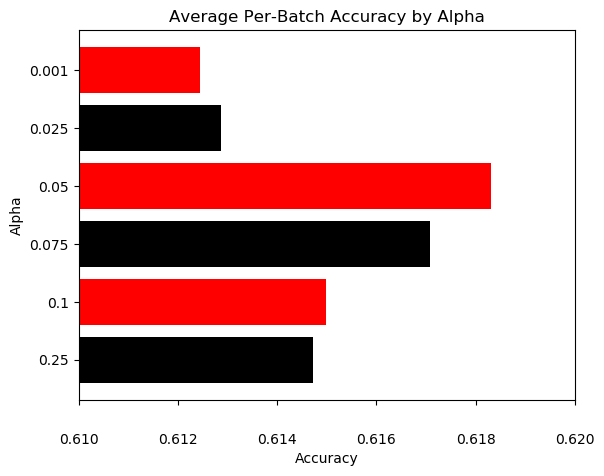

In [50]:
plt.rcdefaults()
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
alphas = ['0.001', '0.025', '0.05', '0.075', '0.1', '0.25']
y_pos = np.arange(len(alphas))
performance = [0.61245, 0.61287, 0.61832, 0.61709, 0.61498, 0.61473]
ax.barh(y_pos, performance, align='center', color='rk')
ax.set(xlim=[0.61,0.620])
ax.set_yticks(y_pos)
plt.tick_params(axis='x', pad=20)
ax.set_yticklabels(alphas)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_ylabel("Alpha")
ax.set_title('Average Per-Batch Accuracy by Alpha')

fig.savefig("alpha_accuracy.png", dpi=400)

plt.show()